# ACC Aim 1: Description of Hit Exposure

The purpose of this notebook is to give a briefly explain the calculations behind a statistical description of the hit exposure of University of Tulsa's football team during the 2017 season.

The first step in the process was to compile the data from disperse tables into a single table. For the analysis program that we'll be using, we call this single table a data frame. The answer the proposed questions, we've actually put together three data frames. The first normalizes the number of hits by the number of players playing a given position. This will allow us to answer those questions which seek a "per position" answer. We'll call this first data frame `df_per_position`. The second data frame normalizes the hit data by the total number of active players involved in the given activity. This will allow us to answer the questions that seek an answer "across all positions." The second data frame will be called `df_per_activity`. The third data frame normalizes the data by the duration of the activity in minutes. For hits that occurred during a game, the duration is defined by the number of minutes the offense or defense played during the game, depending on the position of the player who was hit. The third data frame will be called `df_per_time`. Snippets of the resulting data frames are shown below for reference.

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
df_per_position = pd.read_csv('compiled_by_position.csv', index_col=0)
df_per_position.head()

,activity,before_break,date,h1,h2,h3,h4,h5,player,practice,type
4361,pre,True,2017-07-31 19:05:00,0.5,0.0,0.0,0.0,0.0,linebacker,fall camp practice #1,camp
4360,pre,True,2017-07-31 19:05:00,1.0,0.0,1.0,0.0,0.0,off guard,fall camp practice #1,camp
4358,pat/fg,True,2017-07-31 19:10:00,0.5,0.0,0.0,0.0,0.0,tight end,fall camp practice #1,camp
4356,pat/fg,True,2017-07-31 19:10:00,0.5,0.0,0.0,0.0,0.0,wide receiver,fall camp practice #1,camp
4359,pat/fg,True,2017-07-31 19:10:00,1.0,1.0,0.0,0.0,0.0,off guard,fall camp practice #1,camp


In [64]:
df_per_activity = pd.read_csv('compiled_by_activity.csv', index_col=0)
df_per_activity.head()

,activity,before_break,date,h1,h2,h3,h4,h5,player,practice,type
4361,pre,True,2017-07-31 19:05:00,0.100000,0.000000,0.000000,0.0,0.0,linebacker,fall camp practice #1,camp
4360,pre,True,2017-07-31 19:05:00,0.111111,0.000000,0.111111,0.0,0.0,off guard,fall camp practice #1,camp
4358,pat/fg,True,2017-07-31 19:10:00,0.111111,0.000000,0.000000,0.0,0.0,tight end,fall camp practice #1,camp
4356,pat/fg,True,2017-07-31 19:10:00,0.111111,0.000000,0.000000,0.0,0.0,wide receiver,fall camp practice #1,camp
4359,pat/fg,True,2017-07-31 19:10:00,0.111111,0.111111,0.000000,0.0,0.0,off guard,fall camp practice #1,camp


In [65]:
df_per_time = pd.read_csv('compiled_by_time.csv', index_col=0)
df_per_time.head()

,activity,before_break,date,h1,h2,h3,h4,h5,player,practice,type
4361,pre,True,2017-07-31 19:05:00,0.05,0.0,0.0,0.0,0.0,linebacker,fall camp practice #1,camp
4360,pre,True,2017-07-31 19:05:00,0.10,0.0,0.1,0.0,0.0,off guard,fall camp practice #1,camp
4358,pat/fg,True,2017-07-31 19:10:00,0.20,0.0,0.0,0.0,0.0,tight end,fall camp practice #1,camp
4356,pat/fg,True,2017-07-31 19:10:00,0.20,0.0,0.0,0.0,0.0,wide receiver,fall camp practice #1,camp
4359,pat/fg,True,2017-07-31 19:10:00,0.20,0.2,0.0,0.0,0.0,off guard,fall camp practice #1,camp


Since many of the questions only ask for answers for "bin 5" hits and "the sum of bins 1-4" hits, we'll add a column to our data frame that is the summation of the bins 1-4. As you'll see in the following analyses, I've also done the analysis on the individual bins for reference.

In [66]:
df_per_position['sum14'] = (df_per_position.h1
                            + df_per_position.h2
                            + df_per_position.h3
                            + df_per_position.h4)
df_per_position.head()

,activity,before_break,date,h1,h2,h3,h4,h5,player,practice,type,sum14
4361,pre,True,2017-07-31 19:05:00,0.5,0.0,0.0,0.0,0.0,linebacker,fall camp practice #1,camp,0.5
4360,pre,True,2017-07-31 19:05:00,1.0,0.0,1.0,0.0,0.0,off guard,fall camp practice #1,camp,2.0
4358,pat/fg,True,2017-07-31 19:10:00,0.5,0.0,0.0,0.0,0.0,tight end,fall camp practice #1,camp,0.5
4356,pat/fg,True,2017-07-31 19:10:00,0.5,0.0,0.0,0.0,0.0,wide receiver,fall camp practice #1,camp,0.5
4359,pat/fg,True,2017-07-31 19:10:00,1.0,1.0,0.0,0.0,0.0,off guard,fall camp practice #1,camp,2.0


In [67]:
df_per_activity['sum14'] = (df_per_activity.h1
                           + df_per_activity.h2
                           + df_per_activity.h3
                           + df_per_activity.h4)
df_per_activity.head()

,activity,before_break,date,h1,h2,h3,h4,h5,player,practice,type,sum14
4361,pre,True,2017-07-31 19:05:00,0.100000,0.000000,0.000000,0.0,0.0,linebacker,fall camp practice #1,camp,0.100000
4360,pre,True,2017-07-31 19:05:00,0.111111,0.000000,0.111111,0.0,0.0,off guard,fall camp practice #1,camp,0.222222
4358,pat/fg,True,2017-07-31 19:10:00,0.111111,0.000000,0.000000,0.0,0.0,tight end,fall camp practice #1,camp,0.111111
4356,pat/fg,True,2017-07-31 19:10:00,0.111111,0.000000,0.000000,0.0,0.0,wide receiver,fall camp practice #1,camp,0.111111
4359,pat/fg,True,2017-07-31 19:10:00,0.111111,0.111111,0.000000,0.0,0.0,off guard,fall camp practice #1,camp,0.222222


The last thing to do before answer the questions is the filter each data frame into sets of data that contain game data and sets of data that contain practice data. We'll do this because the research questions specifically ask about hit exposure during games and practices.

In [19]:
games = df_per_position[df_per_position.type == 'game']
practices = df_per_position[df_per_position.type != 'game']
gtot = df_per_team[df_per_team.type == 'game']
ptot = df_per_team[df_per_team.type != 'game']

### Question 1: What is the exposure to hits based on player position over all games?

We'll group the position normalized game data by game and by player. The grouped data is then summed, resulting in the average number of hits for a given position during the given game. A snippet of the resulting summation is shown. 

In [76]:
avg_hits = games.groupby(['event', 'player'], as_index=False)[['h1', 'h2', 'h3', 'h4', 'sum14', 'h5']].sum()
avg_hits.sample(10)

,practice,player,h1,h2,h3,h4,sum14,h5
24,Louisiana Game,running back,17.0,11.5,6.0,0.5,35.0,1.5
57,Oklahoma State Game,cornerback,2.5,2.5,2.0,0.5,7.5,0.5
73,S Florida Game,running back,9.0,8.0,19.0,5.0,41.0,2.0
79,S Methodist Game,linebacker,5.5,5.0,4.0,1.0,15.5,0.0
51,New Mexico Game,off guard,5.0,4.0,2.0,0.5,11.5,0.0
7,Conneticut Game,tight end,6.5,6.5,7.0,3.0,23.0,1.0
35,Memphis Game,tight end,2.0,2.0,3.0,2.0,9.0,1.0
50,New Mexico Game,linebacker,3.5,4.5,1.5,1.0,10.5,1.0
96,Toledo Game,def end,5.0,7.5,2.5,0.5,15.5,0.5
90,Temple Game,off tackle,5.0,5.0,3.5,0.0,13.5,0.0


Finally, considering each position, the median value of the average hits is taken. The final results are below.

In [25]:
grps = avg_hits.groupby('player')
avg_hits.groupby('player').aggregate(np.median)

,h1,h2,h3,h4,sum14,h5
player,,,,,,
cornerback,3.75,2.75,1.25,0.50,8.00,0.00
def end,8.75,8.25,4.50,2.00,23.75,1.00
def tackle,5.00,4.50,1.75,0.75,12.50,0.00
linebacker,5.75,6.75,4.50,1.50,19.50,1.25
off guard,7.00,4.00,2.00,0.50,15.00,0.00
off tackle,5.50,5.50,2.50,0.25,14.50,0.00
running back,9.50,10.75,8.00,4.50,33.00,2.00
safety,4.50,3.00,2.00,0.50,11.50,0.00
tight end,5.00,4.50,4.00,1.50,15.25,0.25


                practice      player   h1   h2   h3   h4  sum14   h5
0        Conneticut Game  cornerback  4.0  4.0  0.5  0.0    8.5  0.5
9           Houston Game  cornerback  2.5  1.5  3.0  0.5    7.5  0.0
18        Louisiana Game  cornerback  4.5  3.5  1.5  0.0    9.5  0.0
28          Memphis Game  cornerback  5.0  2.0  1.0  1.5    9.5  0.5
37             Navy Game  cornerback  2.5  2.5  2.0  0.5    7.5  0.0
47       New Mexico Game  cornerback  5.0  0.5  0.5  0.5    6.5  0.5
57   Oklahoma State Game  cornerback  2.5  2.5  2.0  0.5    7.5  0.5
67        S Florida Game  cornerback  0.0  3.0  0.5  0.5    4.0  0.0
76      S Methodist Game  cornerback  5.0  3.0  1.5  0.0    9.5  0.5
85           Temple Game  cornerback  4.5  4.0  2.5  0.0   11.0  0.0
95           Toledo Game  cornerback  3.5  3.0  1.0  1.0    8.5  0.0
105          Tulane Game  cornerback  2.0  1.0  1.0  0.0    4.0  0.0
         h1     h2     h3   h4  sum14   h5
0.25  2.500  1.875  0.875  0.0   7.25  0.0
0.50  3.750  2.75

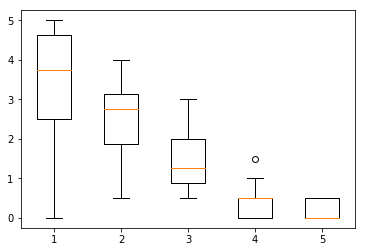

                practice   player    h1    h2    h3   h4  sum14   h5
1        Conneticut Game  def end   8.5   8.5   7.0  3.0   27.0  3.0
10          Houston Game  def end   9.0   8.0   7.0  2.0   26.0  0.5
19        Louisiana Game  def end   5.5   9.5   4.0  2.0   21.0  1.5
29          Memphis Game  def end   4.0  11.5   5.5  4.5   25.5  2.5
38             Navy Game  def end  16.0  15.0  12.0  2.0   45.0  2.0
48       New Mexico Game  def end  10.0   8.0   3.5  0.5   22.0  1.0
58   Oklahoma State Game  def end  11.0   9.0   4.5  1.5   26.0  0.0
68        S Florida Game  def end   9.0   4.5   3.5  2.5   19.5  0.5
77      S Methodist Game  def end   8.5   5.0   4.5  0.0   18.0  0.5
86           Temple Game  def end   9.0   9.5   5.5  2.5   26.5  1.0
96           Toledo Game  def end   5.0   7.5   2.5  0.5   15.5  0.5
106          Tulane Game  def end   6.5   6.5   4.5  2.0   19.5  1.0
        h1    h2     h3    h4   sum14     h5
0.25  6.25  7.25  3.875  1.25  19.500  0.500
0.50  8.75  8

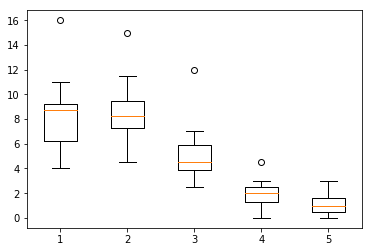

                practice      player    h1    h2    h3   h4  sum14   h5
2        Conneticut Game  def tackle   4.0   3.5   2.5  1.0   11.0  0.0
11          Houston Game  def tackle   4.5   1.0   0.0  0.0    5.5  0.0
20        Louisiana Game  def tackle   4.0   2.5   0.5  0.5    7.5  0.0
30          Memphis Game  def tackle   8.0   7.0   9.0  4.0   28.0  0.0
39             Navy Game  def tackle  11.0   0.0   0.0  0.0   11.0  0.0
49       New Mexico Game  def tackle   7.0   4.0   2.0  1.0   14.0  0.0
59   Oklahoma State Game  def tackle   5.0   5.5   1.5  0.0   12.0  0.5
69        S Florida Game  def tackle   4.0   6.0   8.0  1.0   19.0  0.0
78      S Methodist Game  def tackle   5.0   7.0   1.0  0.0   13.0  0.0
87           Temple Game  def tackle   9.0   5.0  10.0  1.0   25.0  1.0
97           Toledo Game  def tackle   1.0   0.0   0.0  0.0    1.0  0.0
107          Tulane Game  def tackle  15.0  12.0   9.0  1.0   37.0  0.0
        h1     h2     h3    h4   sum14   h5
0.25  4.00  2.125  0

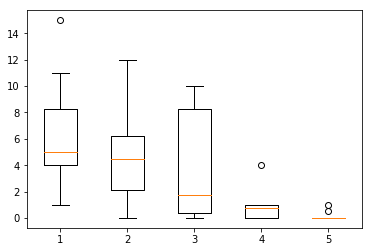

                practice      player    h1   h2   h3   h4  sum14   h5
3        Conneticut Game  linebacker   8.5  4.0  7.5  4.5   24.5  1.5
12          Houston Game  linebacker   7.0  7.0  4.5  2.0   20.5  2.0
21        Louisiana Game  linebacker   6.0  5.0  4.5  1.5   17.0  1.5
31          Memphis Game  linebacker   5.5  7.0  4.0  0.5   17.0  2.0
40             Navy Game  linebacker   9.5  7.5  5.5  1.5   24.0  1.0
50       New Mexico Game  linebacker   3.5  4.5  1.5  1.0   10.5  1.0
60   Oklahoma State Game  linebacker  10.5  8.5  3.5  1.5   24.0  1.5
70        S Florida Game  linebacker   3.0  7.5  6.5  1.5   18.5  1.0
79      S Methodist Game  linebacker   5.5  5.0  4.0  1.0   15.5  0.0
88           Temple Game  linebacker   5.5  6.5  6.5  4.0   22.5  1.0
98           Toledo Game  linebacker   7.5  7.0  7.0  2.5   24.0  2.0
108          Tulane Game  linebacker   4.5  3.0  2.5  0.0   10.0  0.5
        h1     h2     h3     h4   sum14     h5
0.25  5.25  4.875  3.875  1.000  16.625  1.

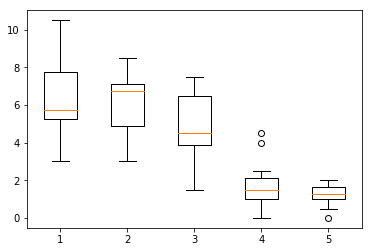

                practice     player    h1    h2   h3   h4  sum14   h5
4        Conneticut Game  off guard   5.0   4.0  0.5  0.0    9.5  0.0
13          Houston Game  off guard   8.0   6.0  2.0  0.5   16.5  0.5
22        Louisiana Game  off guard  18.5  10.0  2.0  0.0   30.5  0.0
32          Memphis Game  off guard   7.0   4.0  5.0  1.0   17.0  0.0
41             Navy Game  off guard   3.5   3.0  1.5  0.0    8.0  0.0
51       New Mexico Game  off guard   5.0   4.0  2.0  0.5   11.5  0.0
61   Oklahoma State Game  off guard   9.5   9.5  3.5  0.5   23.0  0.0
71        S Florida Game  off guard   5.0   4.0  3.5  1.0   13.5  0.0
80      S Methodist Game  off guard   7.0   3.0  0.5  0.0   10.5  0.0
89           Temple Game  off guard  26.5   6.5  5.5  1.5   40.0  0.0
99           Toledo Game  off guard  17.0   9.0  6.0  2.0   34.0  0.0
109          Tulane Game  off guard   5.0   3.0  1.5  0.0    9.5  0.0
          h1     h2     h3   h4   sum14   h5
0.25   5.000  3.750  1.500  0.0  10.250  0.0


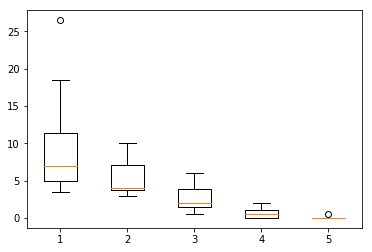

                practice      player    h1   h2   h3   h4  sum14   h5
5        Conneticut Game  off tackle   2.0  0.0  0.0  0.0    2.0  0.0
14          Houston Game  off tackle   9.0  6.0  7.0  0.5   22.5  0.0
23        Louisiana Game  off tackle   6.0  9.0  5.5  0.0   20.5  0.0
33          Memphis Game  off tackle   2.0  1.0  1.0  0.0    4.0  0.0
42             Navy Game  off tackle   6.5  7.0  3.5  0.5   17.5  0.0
52       New Mexico Game  off tackle   7.0  6.0  1.5  1.0   15.5  0.0
62   Oklahoma State Game  off tackle  10.0  8.0  2.0  0.5   20.5  0.0
72        S Florida Game  off tackle   4.5  2.0  1.0  0.0    7.5  0.0
81      S Methodist Game  off tackle   1.0  1.0  0.0  0.0    2.0  0.0
90           Temple Game  off tackle   5.0  5.0  3.5  0.0   13.5  0.0
100          Toledo Game  off tackle  14.0  9.5  3.0  0.5   27.0  0.0
110          Tulane Game  off tackle   4.5  3.0  5.0  0.5   13.0  0.0
         h1    h2     h3    h4   sum14   h5
0.25  3.875  1.75  1.000  0.00   6.625  0.0
0.

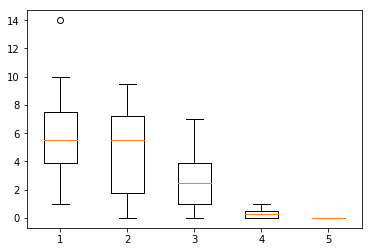

                practice        player    h1    h2    h3    h4  sum14   h5
6        Conneticut Game  running back   3.0   0.0   2.0   0.0    5.0  0.0
15          Houston Game  running back   9.0  12.0   8.0   2.0   31.0  1.0
24        Louisiana Game  running back  17.0  11.5   6.0   0.5   35.0  1.5
34          Memphis Game  running back   8.0   9.0   8.0   5.0   30.0  3.0
43             Navy Game  running back  18.0  17.0   9.0   3.0   47.0  2.0
53       New Mexico Game  running back  10.0  10.0   4.0   6.0   30.0  2.0
63   Oklahoma State Game  running back   8.5   8.5   8.0   4.0   29.0  2.0
73        S Florida Game  running back   9.0   8.0  19.0   5.0   41.0  2.0
82      S Methodist Game  running back  20.0  12.0  13.0  13.0   58.0  1.0
91           Temple Game  running back  18.0  14.0  13.0   5.0   50.0  2.0
101          Toledo Game  running back  11.0  15.0  13.0   8.0   47.0  2.0
111          Tulane Game  running back   5.0   4.0   3.0   0.0   12.0  0.0
          h1      h2    h

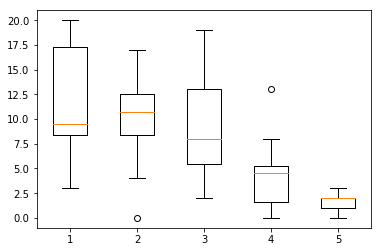

                practice  player   h1   h2   h3   h4  sum14   h5
25        Louisiana Game  safety  5.5  3.5  2.0  0.5   11.5  1.0
44             Navy Game  safety  7.0  2.0  6.0  1.0   16.0  1.0
54       New Mexico Game  safety  3.0  3.0  5.0  1.0   12.0  0.0
64   Oklahoma State Game  safety  4.5  3.5  1.0  0.0    9.0  0.0
92           Temple Game  safety  NaN  NaN  NaN  NaN    NaN  NaN
102          Toledo Game  safety  1.0  1.0  1.0  0.5    3.5  0.0
       h1   h2   h3   h4  sum14   h5
0.25  3.0  2.0  1.0  0.5    9.0  0.0
0.50  4.5  3.0  2.0  0.5   11.5  0.0
0.75  5.5  3.5  5.0  1.0   12.0  1.0
       h1   h2   h3   h4  sum14   h5
0.25  2.5  1.5  4.0  0.5    3.0  1.0


/home/martin/anaconda2/envs/quant/lib/python3.6/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/home/martin/anaconda2/envs/quant/lib/python3.6/site-packages/matplotlib/cbook.py:2066: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/home/martin/anaconda2/envs/quant/lib/python3.6/site-packages/matplotlib/cbook.py:2073: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/home/martin/anaconda2/envs/quant/lib/python3.6/site-packages/matplotlib/cbook.py:2081: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/home/martin/anaconda2/envs/quant/lib/python3.6/site-packages/matplotlib/cbook.py:2082: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


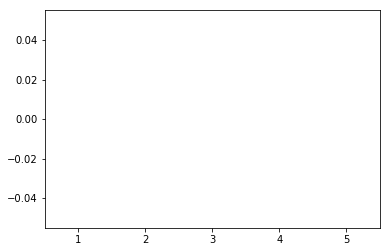

                practice     player    h1    h2    h3   h4  sum14   h5
7        Conneticut Game  tight end   6.5   6.5   7.0  3.0   23.0  1.0
16          Houston Game  tight end   1.5   5.0   8.5  1.0   16.0  0.0
26        Louisiana Game  tight end  14.0  13.5   5.0  1.5   34.0  1.5
35          Memphis Game  tight end   2.0   2.0   3.0  2.0    9.0  1.0
45             Navy Game  tight end  13.5  12.5   2.0  2.5   30.5  0.0
55       New Mexico Game  tight end   7.0   4.0   3.5  0.0   14.5  0.5
65   Oklahoma State Game  tight end   5.0   5.0   5.5  3.5   19.0  1.0
74        S Florida Game  tight end   2.5   3.5   2.5  1.5   10.0  0.0
83      S Methodist Game  tight end   5.0   2.5   4.0  1.0   12.5  0.0
93           Temple Game  tight end   4.5   3.0   4.0  1.0   12.5  0.0
103          Toledo Game  tight end   6.5   5.0  10.0  5.5   27.0  2.0
112          Tulane Game  tight end   1.0   3.5   2.5  1.5    8.5  0.0
         h1     h2     h3     h4   sum14    h5
0.25  2.375  3.375  2.875  1.0

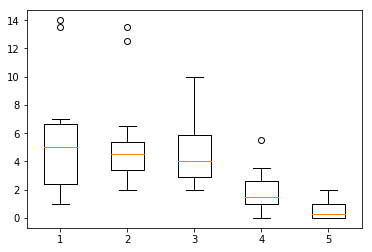

                practice         player   h1   h2   h3   h4  sum14   h5
8        Conneticut Game  wide receiver  8.0  5.5  3.0  0.5   17.0  0.5
17          Houston Game  wide receiver  4.5  2.0  0.5  0.0    7.0  0.0
27        Louisiana Game  wide receiver  5.5  4.5  1.0  0.0   11.0  0.0
36          Memphis Game  wide receiver  3.0  1.0  0.0  1.0    5.0  0.0
46             Navy Game  wide receiver  5.0  4.0  1.0  0.0   10.0  0.0
56       New Mexico Game  wide receiver  5.0  3.5  1.0  0.0    9.5  0.0
66   Oklahoma State Game  wide receiver  7.0  3.5  0.5  0.5   11.5  0.0
75        S Florida Game  wide receiver  0.5  1.0  1.0  0.0    2.5  0.0
84      S Methodist Game  wide receiver  5.0  3.0  1.0  0.0    9.0  0.5
94           Temple Game  wide receiver  9.5  6.0  1.5  0.5   17.5  0.5
104          Toledo Game  wide receiver  3.5  0.5  0.0  0.0    4.0  0.0
113          Tulane Game  wide receiver  0.5  0.0  0.5  0.0    1.0  0.0
         h1     h2   h3   h4   sum14     h5
0.25  3.375  1.000  

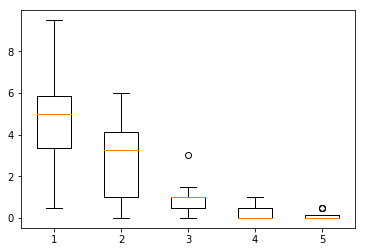

In [58]:
for name, grp in grps:
    print(grp)
    #print(grp[['h1', 'h2', 'h3', 'h4', 'h5']].apply(np.median))
    print(grp.quantile([0.25, 0.50, 0.75]))
    print(grp.quantile([0.25, 0.75]).apply(np.diff).loc[[0.25]])
    plt.boxplot(grp[['h1', 'h2', 'h3', 'h4', 'h5']].values)
    plt.show()

### Question 2: What is the exposure to hits based on player position over all practices?

The code below does the same as for games (as above), but this time with the practice data. Intermediate steps aren't shown. The final results are in the table below.

In [43]:
(practices.groupby(['event', 'player'], as_index=False)[['h1', 'h2', 'h3', 'h4', 'sum14', 'h5']]
          .sum()
          .groupby('player')
          .aggregate(np.median))

,h1,h2,h3,h4,sum14,h5
player,,,,,,
cornerback,1.00,0.50,0.0,0.0,2.00,0.0
def end,2.50,2.00,1.0,0.0,6.00,0.0
def tackle,2.00,0.75,0.0,0.0,3.00,0.0
linebacker,1.50,1.50,0.5,0.0,3.50,0.0
off guard,4.50,1.50,0.0,0.0,6.25,0.0
off tackle,1.75,0.50,0.0,0.0,2.75,0.0
running back,1.50,1.00,0.5,0.0,3.00,0.0
safety,0.75,0.50,0.5,0.0,2.00,0.0
tight end,2.50,2.50,2.0,0.5,9.50,0.0


### Question 3: What is the exposure to hits based on player position by practice type?

Again, the procedure is similar. First, we'll used the same filtered data that only includes practices.

Next, we'll group the data by practice type (tuesday, wednedsay, camp, etc) and player position and sum the hit data. As before, a snippet is below.

In [45]:
hits_by_type = practices\
              .groupby(['event', 'type', 'player'], as_index=False)[['h1', 'h2', 'h3', 'h4', 'sum14', 'h5']]\
              .sum()
hits_by_type.head(20)

,practice,type,player,h1,h2,h3,h4,sum14,h5
0,Bye #1,wed/thurs,cornerback,0.0,1.0,0.0,1.0,2.0,0.0
1,Bye #1,wed/thurs,def end,2.0,0.5,1.0,0.0,3.5,0.5
2,Bye #1,wed/thurs,def tackle,5.0,5.0,2.0,0.0,12.0,0.0
3,Bye #1,wed/thurs,linebacker,1.0,1.0,0.5,0.0,2.5,0.0
4,Bye #1,wed/thurs,off guard,0.5,0.5,0.0,0.0,1.0,0.0
5,Bye #1,wed/thurs,tight end,0.0,1.0,2.0,1.0,4.0,0.0
6,Conneticut #1,tues,def end,1.0,3.0,0.5,0.0,4.5,0.0
7,Conneticut #1,tues,def tackle,2.0,0.5,0.0,0.0,2.5,0.0
8,Conneticut #1,tues,linebacker,4.0,2.0,2.0,0.0,8.0,0.0
9,Conneticut #1,tues,off tackle,2.0,0.0,0.0,0.0,2.0,0.0


This time, we'll group the data by player and practice type before taking the median value of all the practices.

In [52]:
hits_by_type.groupby(['player', 'type']).aggregate(np.median)

h1    h2    h3   h4  sum14   h5
player        type                                        
cornerback    camp       1.25  0.50  0.00  0.0   2.00  0.0
              scrimmage  1.00  0.00  0.00  0.0   1.00  0.0
              thurs      2.50  0.50  0.50  0.0   3.25  0.0
              tues       0.50  1.00  0.00  0.0   2.50  0.0
              wed        0.75  0.50  0.00  0.0   2.25  0.0
              wed/thurs  1.00  1.00  0.00  0.0   2.50  0.0
def end       camp       3.50  4.00  1.50  0.5   7.50  0.0
              scrimmage  1.00  0.00  0.00  0.0   1.00  0.0
              thurs      1.50  0.50  0.25  0.0   2.25  0.0
              tues       2.50  2.50  0.50  0.0   5.00  0.5
              wed        3.50  2.00  1.00  0.5   6.50  0.0
              wed/thurs  2.00  2.50  1.00  0.0   6.00  0.0
def tackle    camp       2.50  0.50  0.00  0.0   3.00  0.0
              scrimmage  1.00  1.50  0.50  0.0   3.00  0.0
              thurs      1.00  0.50  0.00  0.0   2.00  0.0
              tues       3.00  1.00  0.00  0.0   3.50  0.0
              wed        1.00  1.00  0.00  0.0   2.50  0.0
              wed/thurs  2.00  2.00  0.00  0.0   4.00  0.0
linebacker    camp       3.00  2.50  1.00  0.0   7.00  0.0
              scrimmage  1.50  1.00  0.50  0.0   3.00  0.0
              thurs      1.00  0.50  0.00  0.0   1.25  0.0
              tues       3.00  1.50  0.50  0.0   5.50  0.0
              wed        1.50  2.00  1.00  0.0   3.50  0.0
              wed/thurs  1.00  1.50  0.00  0.0   2.50  0.0
off guard     camp       6.00  2.00  0.50  0.0   8.25  0.0
              scrimmage  1.00  0.50  0.00  0.0   1.50  0.0
              thurs      5.00  1.50  0.50  0.0   7.00  0.0
              tues       3.00  1.00  0.00  0.0   4.00  0.0
              wed        5.75  2.25  0.00  0.0   8.75  0.0
              wed/thurs  2.00  0.50  0.00  0.0   2.00  0.0
off tackle    camp       2.00  1.50  0.00  0.0   3.25  0.0
              scrimmage  1.00  0.50  0.00  0.0   1.50  0.0
              thurs      0.50  0.50  0.00  0.0   1.00  0.0
              tues       1.50  0.00  0.00  0.0   2.00  0.0
              wed        3.00  1.50  0.00  0.0   5.00  0.0
              wed/thurs  3.00  1.00  0.00  0.0   4.00  0.0
running back  camp       1.50  2.00  1.00  0.0   5.00  0.0
              scrimmage  3.00  0.50  0.00  0.0   3.50  0.0
              thurs      2.00  1.00  0.00  0.0   2.00  0.0
              tues       1.00  0.00  0.00  0.0   1.50  0.0
              wed        1.50  1.00  1.00  0.0   3.00  0.0
              wed/thurs   NaN   NaN   NaN  NaN    NaN  NaN
safety        camp       0.50  0.50  0.50  0.0   2.00  0.0
              thurs      2.75  1.75  0.00  0.0   5.25  0.0
              tues       0.50  0.75  0.25  0.0   2.00  0.0
              wed        2.00  0.50  0.00  0.0   3.50  0.0
tight end     camp       3.50  4.00  2.00  0.5  10.00  0.0
              scrimmage  0.50  0.50  0.00  0.0   1.00  0.0
              thurs      1.25  0.50  0.00  0.0   1.50  0.0
              tues       3.50  3.00  3.00  1.0  11.00  0.5
              wed        3.00  3.50  1.50  1.0  10.50  0.5
              wed/thurs  1.50  2.00  2.50  1.0   8.50  0.5
wide receiver camp       0.50  0.00  0.00  0.0   0.75  0.0
              scrimmage  0.00  0.00  0.50  0.0   0.50  0.0
              thurs      2.00  0.50  0.00  0.0   3.00  0.0
              tues       1.75  1.00  0.50  0.0   3.00  0.0
              wed        1.00  0.75  0.00  0.0   1.75  0.0
              wed/thurs  2.00  1.00  0.00  0.0   3.00  0.5

A short discussion on the above results. The safety position does not have data for the wed/thurs practice type. This occurs because by this time no safeties (with instrumented helmets) were practicing. Relatedly, the running back position registers a NaN (not a number)entry for the wed/thurs practice type. This happened because the 'attendance by date' table indicates that there were 0 running backs participating on 25-OCT. However, there is hit data for the running back position on this date. When the hit data is normalized, we have (# hits)/(# players) which is 2/0, which does not compute. Therefore, the hit needs to be removed from the raw data or the attendance record should be updated to include the correct number of running backs for 25-OCT. 

### Question 4: What is the exposure by practice activity across all positions?

This question is similar to question 3, only this time looking for exposure based on practice activity (skelly vs. def, 1on1, etc) instead of practice type (tues, wed, camp, etc) and looking at the data across all player positions. As such, we'll used the activity normalized data to answer this question.

In [55]:
hits_by_act = (ptot
    .groupby(['event', 'activity'], as_index=False)[['h1', 'h2', 'h3', 'h4', 'sum14', 'h5']]\
    .sum())
hits_by_act.head(20)

,practice,activity,h1,h2,h3,h4,sum14,h5
0,Bye #1,indy,0.142857,0.000000,0.000000,0.000000,0.142857,0.000000
1,Bye #1,pass rush,0.071429,0.071429,0.000000,0.000000,0.142857,0.000000
2,Bye #1,skell vs. scouts,0.000000,0.142857,0.000000,0.000000,0.142857,0.000000
3,Bye #1,team (3's),0.000000,0.142857,0.285714,0.142857,0.571429,0.000000
4,Bye #1,team vs. 3's,0.000000,0.071429,0.142857,0.000000,0.214286,0.000000
5,Bye #1,team vs. defense,0.071429,0.000000,0.000000,0.000000,0.071429,0.000000
6,Bye #1,team vs. scouts,0.571429,0.428571,0.214286,0.071429,1.285714,0.071429
7,Conneticut #1,indy,0.466667,0.266667,0.133333,0.000000,0.866667,0.000000
8,Conneticut #1,otb,0.066667,0.000000,0.000000,0.000000,0.066667,0.000000
9,Conneticut #1,pass rush,0.066667,0.000000,0.000000,0.000000,0.066667,0.000000


Similar to before, we'll group the data by practice activity before taking the median value of all the practices.

In [56]:
hits_by_act.groupby(['activity']).aggregate(np.median)

,h1,h2,h3,h4,sum14,h5
activity,,,,,,
1on1,0.000000,0.026316,0.000000,0.000000,0.052632,0.000000
1on1 then scouts,0.209524,0.204762,0.069048,0.035714,0.519048,0.071429
cougar full zone,0.105263,0.000000,0.000000,0.000000,0.105263,0.000000
cub session,0.294118,0.058824,0.058824,0.000000,0.411765,0.000000
eagle run fit period,0.187500,0.062500,0.062500,0.062500,0.375000,0.000000
goal line,0.214286,0.071429,0.000000,0.000000,0.285714,0.000000
halfzone,0.000000,0.000000,0.050000,0.000000,0.050000,0.000000
indy,0.210526,0.150000,0.050000,0.000000,0.473684,0.000000
inside,0.055556,0.157895,0.052632,0.000000,0.421053,0.000000


### Question 5a: What is the exposure to hits before and after break across all positions?

I'll assume that this part of the question is only asking about practices. Again, since this question is asking for data across all positions, we'll use the team normalized data. Furthermore, the question is specifically asking for the bins to be treated separately, so we won't use the summed bins 1-4 data. In the results below, the rows are marked `False` and `True`. These answer the question "is the data from before the break/halftime?" So, `False` data is during the second half of practice/second half of the game and `True` is during the first half of practice/first half of the game.

In [49]:
(ptot.groupby(['event', 'before_break'], as_index=False)[['h1', 'h2', 'h3', 'h4', 'h5']]
     .sum()
     .groupby(['before_break'])
     .aggregate(np.median))

,h1,h2,h3,h4,h5
before_break,,,,,
False,1.153947,0.787594,0.4375,0.111111,0.05
True,0.968750,0.625000,0.2500,0.051316,0.00


### Question 5b: What is the exposure to hits before and after halftime across all positions?

Same question as above, this time for game data.

In [50]:
(gtot.groupby(['event', 'before_break'], as_index=False)[['h1', 'h2', 'h3', 'h4', 'h5']]
     .sum()
     .groupby(['before_break'])
     .aggregate(np.median))

,h1,h2,h3,h4,h5
before_break,,,,,
False,2.420833,2.188235,1.572549,0.50,0.242647
True,3.894444,2.618056,1.916667,0.75,0.218750
